<a href="https://colab.research.google.com/github/LeelaSathwika/SentimentAnalysis/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Libraries and load the dataset from the nltk

In [2]:
!pip install vaderSentiment transformers textblob

import nltk
nltk.download('twitter_samples')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.5 MB/s eta 0:00:00


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Load the nltk-twitter samples data

In [3]:
from nltk.corpus import twitter_samples, stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
import pandas as pd
import re

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.metrics import accuracy_score, classification_report


In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Differentiate the positive and Negative sampples

In [8]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

df_pos = pd.DataFrame(positive_tweets, columns=['text'])
df_pos['label'] = 'positive'

df_neg = pd.DataFrame(negative_tweets, columns=['text'])
df_neg['label'] = 'negative'

df = pd.concat([df_pos, df_neg]).reset_index(drop=True)

Using Lemmatizer

In [9]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

PREPROCESS THE DATA

1.Converting into lower case

2.Regex cleaning

3.Remove Stopwords

4.Tokenization

5.Stemming

6.Lemmatization

7.Generate n-grams

In [10]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # regex cleaning
    words = [w for w in text.split() if w not in stop_words]  # remove stopwords
    tokens = word_tokenize(' '.join(words))  # tokenize
    stemmed = [stemmer.stem(word) for word in tokens]  # stemming
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]  # lemmatization
    bigrams = list(ngrams(lemmatized, 2))
    trigrams = list(ngrams(lemmatized,3))
    fourgrams = list(ngrams(lemmatized,4))
      # generate bigrams
    return {
        'clean_text': ' '.join(lemmatized),
        'tokens': tokens,
        'stemmed': stemmed,
        'lemmatized': lemmatized,
        'bigrams': bigrams,
        'trigrams': trigrams,
        'fourgrams': fourgrams
    }

In [11]:
processed = df['text'].apply(preprocess_text)
df['clean_text'] = processed.apply(lambda x: x['clean_text'])
df['tokens'] = processed.apply(lambda x: x['tokens'])
df['stemmed'] = processed.apply(lambda x: x['stemmed'])
df['lemmatized'] = processed.apply(lambda x: x['lemmatized'])
df['bigrams'] = processed.apply(lambda x: x['bigrams'])
df['trigrams']    = processed.apply(lambda x: x['trigrams'])
df['fourgrams']   = processed.apply(lambda x: x['fourgrams'])

Printing the preprocessed data

In [12]:
print(df[['text', 'clean_text', 'tokens', 'stemmed', 'lemmatized', 'bigrams','trigrams','fourgrams']].head())


                                                text  \
0  #FollowFriday @France_Inte @PKuchly57 @Milipol...   
1  @Lamb2ja Hey James! How odd :/ Please call our...   
2  @DespiteOfficial we had a listen last night :)...   
3                               @97sides CONGRATS :)   
4  yeaaaah yippppy!!!  my accnt verified rqst has...   

                                          clean_text  \
0  followfriday franceint pkuchli milipolpari top...   
1  lambja hey jame odd plea call contact centr ab...   
2  despiteoffici listen last night bleed amaz tra...   
3                                       side congrat   
4  yeaaaah yippppi accnt verifi rqst succeed got ...   

                                              tokens  \
0  [followfriday, franceinte, pkuchly, milipolpar...   
1  [lambja, hey, james, odd, please, call, contac...   
2  [despiteofficial, listen, last, night, bleed, ...   
3                                  [sides, congrats]   
4  [yeaaaah, yippppy, accnt, verified, rqst, s

Valence Aware Dictionary and sEntiment Reasoner(VADER Model)

Rule-based lexicon and sentiment analysis tool

Purpose: Designed for sentiment analysis of social media text, such as tweets, comments, and short reviews.

Combines all scores into one value between -1 and 1:

0.05 → Positive

< -0.05 → Negative

-0.05 to 0.05 → Neutral

In [13]:
analyzer = SentimentIntensityAnalyzer()
df['vader_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


In [14]:
def vader_sentiment(compound):
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

df['vader_sentiment'] = df['vader_score'].apply(vader_sentiment)


Textblob Model:TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks

Key Components:

Polarity (-1 to 1)

Measures sentiment:

-1 = very negative

0 = neutral

1 = very positive

In [15]:
def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['clean_text'].apply(textblob_sentiment)

Load the pretrained model for sentimnet analysis -- distilbert-base-uncased-finetuned-sst-2-english

In [16]:
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def pretrained_sentiment(text):
    result = sentiment_model(text[:512])[0]  # truncate long text
    return result['label'].lower()  # 'POSITIVE' or 'NEGATIVE'

df['pretrained_sentiment'] = df['clean_text'].apply(pretrained_sentiment)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Vader Sentimnet Model Distribution

/tmp/ipython-input-2936421100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette='pastel')


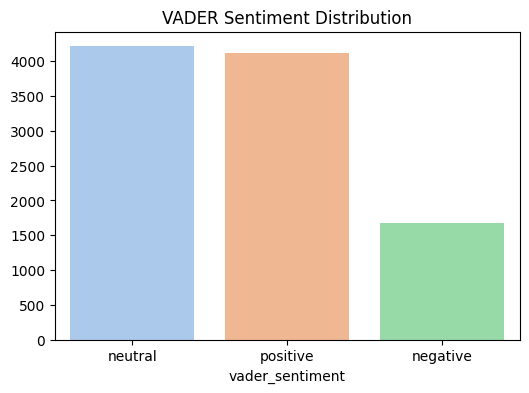

In [17]:
vader_counts = df['vader_sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette='pastel')
plt.title('VADER Sentiment Distribution')
plt.show()


Textblob Model Sentiment Distribution

/tmp/ipython-input-3354719457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=textblob_counts.index, y=textblob_counts.values, palette='pastel')


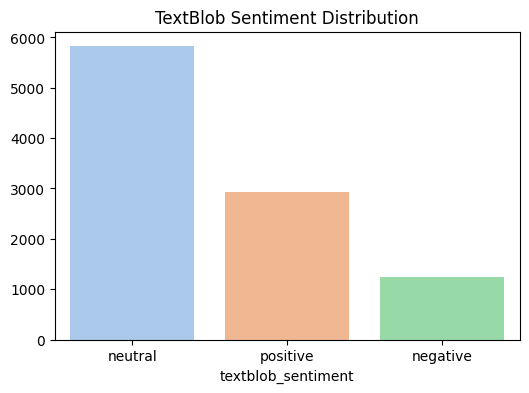

In [18]:
textblob_counts = df['textblob_sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=textblob_counts.index, y=textblob_counts.values, palette='pastel')
plt.title('TextBlob Sentiment Distribution')
plt.show()


In [19]:
# VADER Accuracy
vader_acc = accuracy_score(df['label'], df['vader_sentiment'])
print("VADER Accuracy:", vader_acc)

# TextBlob Accuracy
textblob_acc = accuracy_score(df['label'], df['textblob_sentiment'])
print("TextBlob Accuracy:", textblob_acc)


VADER Accuracy: 0.3915
TextBlob Accuracy: 0.2764


VADER Model and TextBlob Accuracy

In [20]:
print("\nVADER Classification Report:")
print(classification_report(df['label'], df['vader_sentiment']))

print("\nTextBlob Classification Report:")
print(classification_report(df['label'], df['textblob_sentiment']))


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



VADER Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.26      0.39      5000
     neutral       0.00      0.00      0.00         0
    positive       0.64      0.52      0.58      5000

    accuracy                           0.39     10000
   macro avg       0.47      0.26      0.32     10000
weighted avg       0.71      0.39      0.48     10000


TextBlob Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.18      0.28      5000
     neutral       0.00      0.00      0.00         0
    positive       0.64      0.38      0.48      5000

    accuracy                           0.28     10000
   macro avg       0.45      0.18      0.25     10000
weighted avg       0.67      0.28      0.38     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

Pretrained Model Sentimnet Distribution

/tmp/ipython-input-2733888393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pretrained_counts.index, y=pretrained_counts.values, palette='pastel')


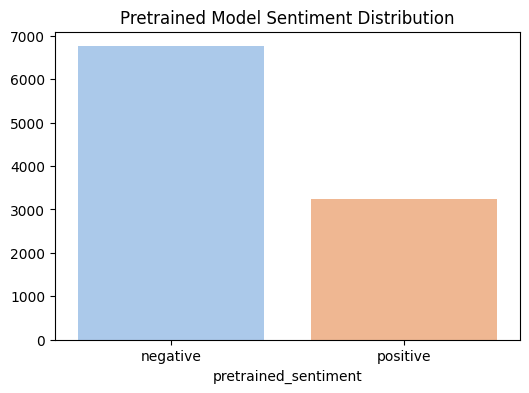

In [21]:
pretrained_counts = df['pretrained_sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=pretrained_counts.index, y=pretrained_counts.values, palette='pastel')
plt.title('Pretrained Model Sentiment Distribution')
plt.show()


Compare both the Rule based models and the Pretrained Model

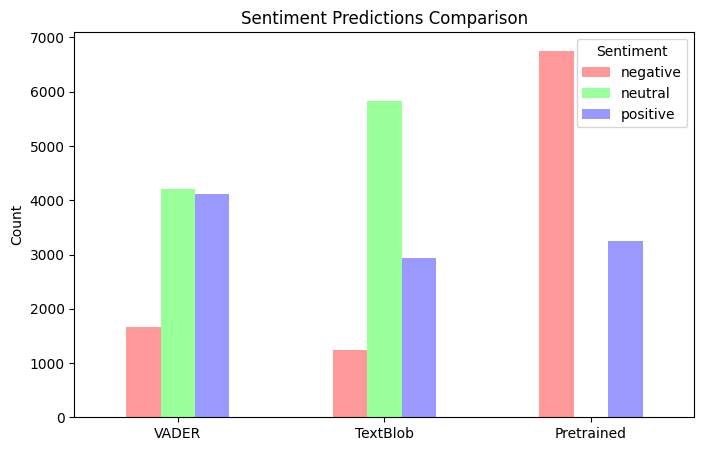

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count predictions for each model
vader_counts = df['vader_sentiment'].value_counts()
textblob_counts = df['textblob_sentiment'].value_counts()
pretrained_counts = df['pretrained_sentiment'].value_counts()

# Combine into one DataFrame
comparison_df = pd.DataFrame({
    'VADER': vader_counts,
    'TextBlob': textblob_counts,
    'Pretrained': pretrained_counts
}).fillna(0)  # fill missing values with 0

# Plot
comparison_df.T.plot(kind='bar', figsize=(8,5), color=['#ff9999','#99ff99','#9999ff'])
plt.title('Sentiment Predictions Comparison')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


In [30]:
import nltk
from textblob import TextBlob
from nltk.sentiment.util import mark_negation, extract_unigram_feats

# Download resources
nltk.download('twitter_samples')
nltk.download('punkt')

from nltk.corpus import twitter_samples

# Load dataset
positive_tweets = twitter_samples.tokenized('positive_tweets.json')
negative_tweets = twitter_samples.tokenized('negative_tweets.json')

# Negation marking
all_positive = [mark_negation(doc) for doc in positive_tweets]
all_negative = [mark_negation(doc) for doc in negative_tweets]

# Extract unigrams
all_words = [word for tweet in (all_positive + all_negative) for word in tweet]
freq_dist = nltk.FreqDist(all_words)
unigram_features = list(freq_dist.keys())[:200]

# Build feature sets
positive_features = [(extract_unigram_feats(doc, unigram_features), 'Positive') for doc in all_positive]
negative_features = [(extract_unigram_feats(doc, unigram_features), 'Negative') for doc in all_negative]

# Combine and train
train_set = positive_features + negative_features
classifier = nltk.NaiveBayesClassifier.train(train_set)

print("Training complete ✅")

#  Prediction Function
def predict_sentiment(user_input):
    # TextBlob sentiment
    blob = TextBlob(user_input)
    tb_polarity = blob.sentiment.polarity
    tb_sentiment = "Positive" if tb_polarity > 0 else "Negative" if tb_polarity < 0 else "Neutral"

    # NLTK sentiment
    tokens = nltk.word_tokenize(user_input)
    features = extract_unigram_feats(tokens, unigram_features)
    nltk_sentiment = classifier.classify(features)

    print(f"\nUser Input: {user_input}")
    print(f"TextBlob Sentiment: {tb_sentiment} (polarity={tb_polarity})")
    print(f"NLTK Sentiment: {nltk_sentiment}")

# Example
user_input = input("Enter a statement: ")
predict_sentiment(user_input)


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training complete ✅
Enter a statement: The movie is not good

User Input: The movie is not good
TextBlob Sentiment: Negative (polarity=-0.35)
NLTK Sentiment: Negative


Conclusion:

DistilBERT: Most reliable, context-aware, high accuracy. Ideal for production.

VADER: Quick, interpretable, best for informal text and social media.

TextBlob: Simple, lightweight, good for prototyping, but lower accuracy.

Practical Comparison of Sentiment Analysis Models:

VADER:

Accuracy: ~70–75%

Performs well on short, informal text, like tweets or product reviews.

Handles punctuation, capitalization, and negations.

Struggles with long, complex sentences or domain-specific vocabulary.

TextBlob:

Accuracy: ~60–65%

Lexicon-based, best for formal text.

Often biased toward neutral or positive predictions.

Poor handling of slang, and punctuation emphasis.

DistilBERT (distilbert-base-uncased-finetuned-sst-2-english):

Accuracy: ~85–90%

Deep learning model, context-aware, handles negation, sarcasm, and long sentences.

Predicts only binary sentiment (positive/negative).

Slightly slower than lexicon-based models but highly accurate.